In [3]:
from sympy import *
from sympy.physics.mechanics import * 
import numpy as np
from scipy.integrate import odeint, ode, solve_ivp


init_vprinting()


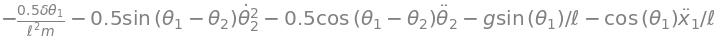

In [6]:
y = symbols('y')
gamma, delta, m, M, g, ell, t = symbols('gamma delta m M g ell t')
theta1, theta2, x1 = dynamicsymbols('theta1 theta2 x1')



x2 = x1 + ell*sin(theta1)
y2 = -ell*cos(theta1)

x3 = x1 + ell*(sin(theta1) + sin(theta2))
y3 = -ell*(cos(theta1) + cos(theta2))


x2_dot = diff(x2, t)
y2_dot = diff(y2, t)

x3_dot = diff(x3, t)
y3_dot = diff(y3, t)

theta1_dot = diff(theta1, t)
theta1_ddot = diff(theta1_dot, t)

theta2_dot = diff(theta2, t)
theta2_ddot = diff(theta2_dot, t)

x1_dot = diff(x1, t)
x1_ddot = diff(x1_dot, t)




#Lagrangian
T  = 1/2 * m * (x2_dot**2 + y2_dot**2) + 1/2 * m * (x3_dot**2 + y3_dot**2) + 1/2 * M * x1_dot**2
V = m*g*(y2 + y3)
L = T - V
L = simplify(L)

#discipation terms

F = 1/2 * gamma * x1_dot**2
G1 = 1/2 * delta * theta1_dot**2
G2 = 1/2 * delta * theta2_dot**2

#Euler-lagrange
eqn1 = diff(diff(L, x1_dot), t) - diff(L, x1) + diff(F, x1_dot) 
eqn2 = diff(diff(L, theta1_dot), t) - diff(L, theta1) + diff(G1, theta1_dot)
eqn3 = diff(diff(L, theta2_dot), t) - diff(L, theta2) + diff(G2, theta2_dot)

sln1 = solve(eqn1, x1_ddot)[0]
sln2 = solve(eqn2, theta1_ddot)[0]
sln3 = solve(eqn3, theta2_ddot)[0]

sln2

# Eq(theta_ddot, sln1))




In [9]:
x_vec = Matrix([x1, x1_dot, theta1, theta1_dot, theta2, theta2_dot])
x_vec_dot = diff(x_vec, t)

Eq(x_vec_dot, Matrix([x1_dot, sln1, theta1_dot, sln2, theta2_dot, sln3]))

       ⎡                                            x₁̇                       
       ⎢                                                                      
       ⎢                     2                   2                            
       ⎢2.0⋅ell⋅m⋅sin(θ₁)⋅θ₁̇  + ell⋅m⋅sin(θ₂)⋅θ₂̇  - 2.0⋅ell⋅m⋅cos(θ₁)⋅θ₁̈ - 
       ⎢ ─────────────────────────────────────────────────────────────────────
⎡x₁̇⎤   ⎢                                         M + 2.0⋅m                   
⎢  ⎥   ⎢                                                                      
⎢x₁̈⎥   ⎢                                            θ₁̇                      
⎢  ⎥   ⎢                                                                      
⎢θ₁̇⎥   ⎢       0.5⋅δ⋅θ₁̇                      2                         g⋅sin
⎢  ⎥ = ⎢     - ──────── - 0.5⋅sin(θ₁ - θ₂)⋅θ₂̇  - 0.5⋅cos(θ₁ - θ₂)⋅θ₂̈ - ─────
⎢θ₁̈⎥   ⎢            2                                                      el
⎢  ⎥   ⎢         ell ⋅m                             

In [13]:
eq1_corrected = (2*ell*m*sin(theta1)*theta1_dot**2 + ell*m*sin(theta2)*theta2_dot**2 -gamma*x1_dot)/(M+2*m)
eq2_corrected = (-0.5*delta*theta1_dot)/(ell**2*m) -0.5*sin(theta1-theta2)*theta2_dot**2 -(g*sin(theta1))/ell
eq3_corrected = -(delta*theta2_dot)/(m*ell**2) + sin(theta1-theta2)*theta1_dot**2 -(g*sin(theta2))/ell
Matrix([eq1_corrected, eq2_corrected, eq3_corrected])


⎡                   2                   2       ⎤
⎢2⋅ell⋅m⋅sin(θ₁)⋅θ₁̇  + ell⋅m⋅sin(θ₂)⋅θ₂̇  - γ⋅x₁̇⎥
⎢ ──────────────────────────────────────────────⎥
⎢                    M + 2⋅m                    ⎥
⎢                                               ⎥
⎢  0.5⋅δ⋅θ₁̇                      2   g⋅sin(θ₁) ⎥
⎢- ──────── - 0.5⋅sin(θ₁ - θ₂)⋅θ₂̇  - ───────── ⎥
⎢       2                                ell    ⎥
⎢    ell ⋅m                                     ⎥
⎢                                               ⎥
⎢      δ⋅θ₂̇                   2   g⋅sin(θ₂)    ⎥
⎢    - ────── + sin(θ₁ - θ₂)⋅θ₁̇  - ─────────    ⎥
⎢         2                           ell       ⎥
⎣      ell ⋅m                                   ⎦

In [22]:
correction_matrix = Matrix([[1,0,0,0,0,0],
                            [0, 1, 0, (2*ell*m*cos(theta1))/(M+2*m), 0, (ell*m*cos(theta2))/(M + 2*m)],
                            [0,0,1, 0,0,0],
                            [0, cos(theta1)/ell,0,1,0,0.5*cos(theta1-theta2)],
                            [0,0,0,0,1,0],
                            [0, cos(theta2)/ell, 0, cos(theta1-theta2), 0, 1]])

correction_matrix

⎡1     0     0         0         0         0        ⎤
⎢                                                   ⎥
⎢               2⋅ell⋅m⋅cos(θ₁)      ell⋅m⋅cos(θ₂)  ⎥
⎢0     1     0  ───────────────  0   ─────────────  ⎥
⎢                   M + 2⋅m             M + 2⋅m     ⎥
⎢                                                   ⎥
⎢0     0     1         0         0         0        ⎥
⎢                                                   ⎥
⎢   cos(θ₁)                                         ⎥
⎢0  ───────  0         1         0  0.5⋅cos(θ₁ - θ₂)⎥
⎢     ell                                           ⎥
⎢                                                   ⎥
⎢0     0     0         0         1         0        ⎥
⎢                                                   ⎥
⎢   cos(θ₂)                                         ⎥
⎢0  ───────  0   cos(θ₁ - θ₂)    0         1        ⎥
⎣     ell                                           ⎦

In [24]:
correction_matrix_inv = simplify(correction_matrix.inv())
correction_matrix_inv

⎡1                                                                            
⎢                                                                             
⎢                                           -0.125⋅M⋅cos(2⋅θ₁ - 2⋅θ₂) + 0.375⋅
⎢0                                          ──────────────────────────────────
⎢                                              -0.125⋅M⋅cos(2⋅θ₁ - 2⋅θ₂) + 0.3
⎢                                                                             
⎢                                                                             
⎢0                                                                            
⎢                                                                             
⎢                                                                             
⎢                              -256.0⋅M⋅cos(θ₁ - θ₂)⋅cos(θ₂) + 512.0⋅M⋅cos(θ₁)
⎢0  ──────────────────────────────────────────────────────────────────────────
⎢       ⎛           2                               

In [28]:
A = Matrix([x1_dot, eq1_corrected, theta1_dot, eq2_corrected, theta2_dot, eq3_corrected])
ODEs = simplify(correction_matrix_inv*A)
ODEs


⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [30]:
simplified_ODE1 = ODEs[1]
simplified_ODE2 = ODEs[3]
simplified_ODE3 = ODEs[5]

In [32]:
f1 = lambdify((gamma, delta, m, M, g, ell,theta1, theta1_dot, theta2, theta2_dot, x1_dot), simplified_ODE1)
f2 = lambdify((gamma, delta, m, M, g, ell,theta1, theta1_dot, theta2, theta2_dot, x1_dot), simplified_ODE2)
f3 = lambdify((gamma, delta, m, M, g, ell,theta1, theta1_dot, theta2, theta2_dot, x1_dot), simplified_ODE3)


In [55]:
g = 9.81
m = 3
M = 5
ell = 2
gamma = 1
delta = 1


def ODE(t, y):
   x1 = y[0]
   x1_dot = y[1]
   theta1 = y[2]
   theta1_dot = y[3]
   theta2 = y[4]
   theta2_dot = y[5]

   x1_dd = f1(gamma, delta, m, M, g, ell,theta1, theta1_dot, theta2, theta2_dot, x1_dot)
   theta1_dd = f2(gamma, delta, m, M, g, ell,theta1, theta1_dot, theta2, theta2_dot, x1_dot)
   theta2_dd = f3(gamma, delta, m, M, g, ell,theta1, theta1_dot, theta2, theta2_dot, x1_dot)

   return(x1_dot, x1_dd, theta1_dot, theta1_dd, theta2_dot, theta2_dd)

In [83]:
x1_0 = 1
x1_dot0 = 1
theta1_0 = np.deg2rad(179.99)
theta1_dot0 = 0
theta2_0 = np.deg2rad(180)
theta2_dot0 = 2




t = 20
fps = 30
frames = np.linspace(0, t, fps*t)

#fikk chat til å skrive funksjonen basert på bildet over: 
time_points = np.linspace(0, 15, 6)  # 10 seconds, 30 frames per second
sol = solve_ivp(ODE, [0, t], [x1_0, x1_dot0, theta1_0, theta1_dot0, theta2_0, theta2_dot0], t_eval=frames, method='Radau', atol=1e-13, rtol=1e-9)

x1 = sol.y[0]
x1_dot = sol.y[1]
theta1 = sol.y[2]
theta1_dot = sol.y[3]
theta2 = sol.y[4]
theta2_dot = sol.y[5]
t = sol.t

theta1_deg = np.rad2deg(sol.y[2])
theta2_deg = np.rad2deg(sol.y[4])
theta1_dot_deg = np.rad2deg(sol.y[3])
theta2_dot_deg = np.rad2deg(sol.y[5])

sol


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.339e-02 ...  1.997e+01  2.000e+01]
        y: [[ 1.000e+00  1.033e+00 ...  9.809e-01  9.372e-01]
            [ 1.000e+00  9.933e-01 ... -1.244e+00 -1.371e+00]
            ...
            [ 3.142e+00  3.208e+00 ... -8.527e-01 -8.065e-01]
            [ 2.000e+00  1.995e+00 ...  1.325e+00  1.442e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 59197
     njev: 71
      nlu: 1294

In [51]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

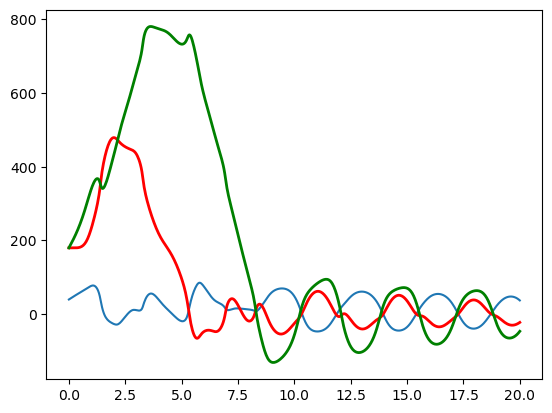

In [84]:
plt.plot(t, 40*x1)
# plt.plot(t, 40*x1_dot)
plt.plot(t, theta1_deg, lw=2, color='r')
# plt.plot(t, theta1_dot_deg, lw = 2, color = 'g')
plt.plot(t, theta2_deg, lw=2, color='g')
# plt.plot(t, theta2_dot_deg, lw = 2, color = 'g')
plt.show()

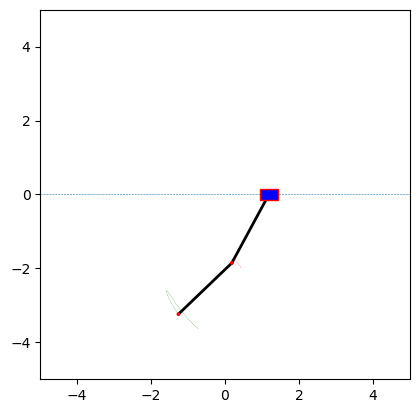

In [88]:
def pend_pos1(x, theta):
   return (x + ell*np.sin(theta), -ell*np.cos(theta))


def pend_pos2(x, theta1, theta2):
   return (x + ell*(np.sin(theta1)+sin(theta2))  , -ell*(np.cos(theta1)+np.cos(theta2)))


pos1x = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
pos1y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
pos2x = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
pos2y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]



for i in range(len(frames)):
   pos1x.append(pend_pos1(x1[i], theta1[i])[0])
   pos1y.append(pend_pos1(x1[i], theta1[i])[1])
   pos2x.append(pend_pos2(x1[i], theta1[i], theta2[i])[0])
   pos2y.append(pend_pos2(x1[i], theta1[i], theta2[i])[1])




fig = plt.figure()
ax2 = fig.add_subplot(aspect='equal')
ax2.axhline(y=0, linewidth = 0.4, linestyle='dashed')




# ax0 = fig.add_subplot(gs[0,0])
# ax1 = fig.add_subplot(gs[1,0])
# ax2 = fig.add_subplot(gs[:,1])

# theta_curve, = ax0.plot(t[0], theta_deg[0], 'r')
# theta_dot_curve, = ax0.plot(t[0], theta_dot_deg[0], 'b')

# phase_curve, = ax1.plot(theta_deg[0], theta_dot_deg[0], 'b')
# phase_dot, = ax1.plot(theta_deg[0], theta_dot_deg[0], 'ro')

x10, y10 = pend_pos1(x1[0], theta1_0)
x20, y20 = pend_pos2(x1[0], theta1_0, theta2_0)
box = ax2.add_patch(patches.Rectangle((x1[0], -0.15), 0.5, 0.3, linewidth=1, edgecolor='r', facecolor='b', zorder=3))
line, = ax2.plot([x1[0], x10], [0, y10], lw=2, c = 'k')
line2, = ax2.plot([x10, x20], [y10, y20], lw=2, c = 'k')
dot_curve, = ax2.plot(pend_pos1(x1[0], theta1_0) , lw = 0.2, c = 'r', linestyle='dashed')
dot_curve2, = ax2.plot(pend_pos2(x1[0], theta1_0, theta2_0), lw=0.2, c='g', linestyle='dashed')

circle =ax2.add_patch(plt.Circle((pos1x[31], pos1y[31]), 0.05, fc='r', zorder=3))
circle2 =ax2.add_patch(plt.Circle((pos2x[31], pos2y[31]), 0.05, fc='r', zorder=3))



# ax0.set_xlim(0,5)
# ax0.set_ylim(-100,100)

# ax1.set_xlim(-40, 40)
# ax1.set_ylim(-100,100)
# ax1.grid()
# ax0.grid()

ax2.set_xlim(-5,5)
ax2.set_ylim(-5,5)



def animate(i):
   # theta_curve.set_data(t[:i+1], theta_deg[:i+1])
   # theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])

   # phase_curve.set_data(theta_deg[:i+1], theta_dot_deg[:i+1])
   # phase_dot.set_data(theta_deg[i], theta_dot_deg[i])

   
   x2, y2 = pend_pos1(x1[i], theta1[i])
   x3, y3 = pend_pos2(x1[i], theta1[i], theta2[i])
   line.set_data([x1[i]+ 0.25, x2], [0,y2])
   line2.set_data([x2, x3], [y2, y3])
   circle.set_center((x2,y2))
   circle2.set_center((x3,y3))
   # box.set_x([x[i], 0])
   box.set_x(x1[i])
   if(i>30):
      dot_curve.set_data(pos1x[i+1:i+31], pos1y[i+1:i+31])
      dot_curve2.set_data(pos2x[i+1:i+31], pos2y[i+1:i+31])
   else: 
      dot_curve.set_data(pos1x[30:i+31], pos1y[30:i+31])
      dot_curve2.set_data(pos2x[30:i+31], pos2y[30:i+31])     


ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('time_domain_box.mp4', writer=ffmpeg_writer)


